In [ ]:
# #Mount your drive
from google.colab import drive
drive.mount('/content/drive')

# Code

1.   Load the MNIST dataset as in Homework 1.
Filter the training dataset into a subset that contains only the '3' and '9' images.

2.   Implement and run the kMeans algorithm on the filtered subset of 1. with k = 2, 3, 5, 10. Sample and plot 3 examples form each cluster. For example, the k = 2 will make 2 clusters; sample 3 examples from cluster 1 and plot them, and 3 samples from cluster 2 and plot them.

3.   Reduce the 784 dimensionality of the raw '3' and '9' images of the subset from 1. to eigenspaces of 2, 5 and 10 dimensions (that is, you will have 3 new datasets). Implement and run the kMeans algorithm on these new subsets with k = 2, 3, 5, 10 (you'll run kMeans 12 times)

  - Plot the clusterization cases of the eigenspace of dimension 2, colored by cluster (k = 2, 3, 5, 10).
  - Find a way to evaluate the clusterization of the eigenspaces of dimensions 5 and 10. There are no correct answers here, as long as there is a meaningful/informative interpretation that can be derived from it.


In total, you'd run your kMeans 16 times in this homework (4 times on raw data for ex. 2., 12 times on reduced dimensionality data for ex. 3.).

In [ ]:
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt
import urllib.request

In [ ]:
# load data
def load_data(dataset):
    if not os.path.isfile(dataset):
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('Loading data...')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)

    print('... data has been loaded!')
    return train_set, valid_set, test_set


#Load the data into train, validation and test sets
train_set, val_set, test_set = load_data('mnist.pkl.gz')

Loading data...
... data has been loaded!


In [ ]:
# filter subset
accuracy=[]
subset=[]
subset_label=[]
for i in range(len(train_set[0])):
  if train_set[1][i]==3 or train_set[1][i]==9:
    subset.append(train_set[0][i])
    subset_label.append(train_set[1][i])
len(subset)

10089

In [ ]:
# check accuracy
def check_acc(kmean,k):
  correct = 0
  wrong = 0
  for i in range(k):
    three = 0
    nine = 0
    for j in range(len(subset_label)):
      if kmean[j]==i and subset_label[j]==3: three+=1
      if kmean[j]==i and subset_label[j]==9: nine+=1
    if three > nine :
      correct += three
      wrong += nine
    else:
      correct += nine
      wrong += three
  if correct+wrong != len(subset_label): print("error")
  return correct/len(subset_label)

In [ ]:
from sklearn.cluster import KMeans

#for problem 2
def plot_kmeans(k):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(subset)
  accuracy.append(check_acc(kmeans.labels_,k))
  label = []
  for i in range(k):
    count = 0
    for j in range(len(subset)):
      if kmeans.labels_[j]==i:
        label.append(j)
        count+=1
      if count>=3: break
  fig, axes = plt.subplots(k, 3, figsize=(3, k))
  for i, ax in enumerate(axes.flat):
    ax.imshow(subset[label[i]].reshape(28, 28), cmap='gray')
    ax.axis('off')
  plt.tight_layout()
  plt.show()


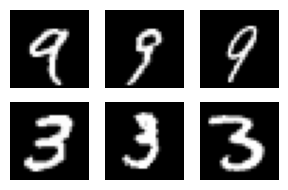

In [ ]:
# k-means k=2
plot_kmeans(2)

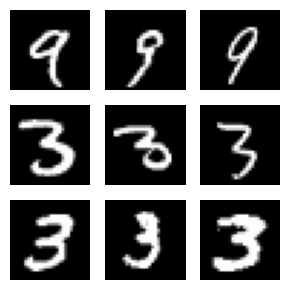

In [ ]:
# k-means k=3
plot_kmeans(3)

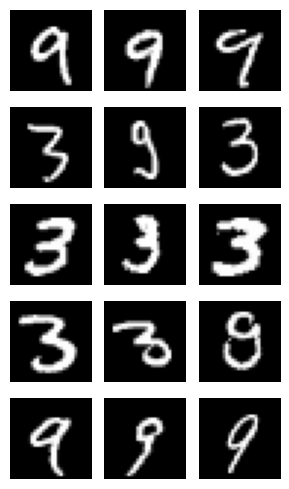

In [ ]:
# k-means k=5
plot_kmeans(5)

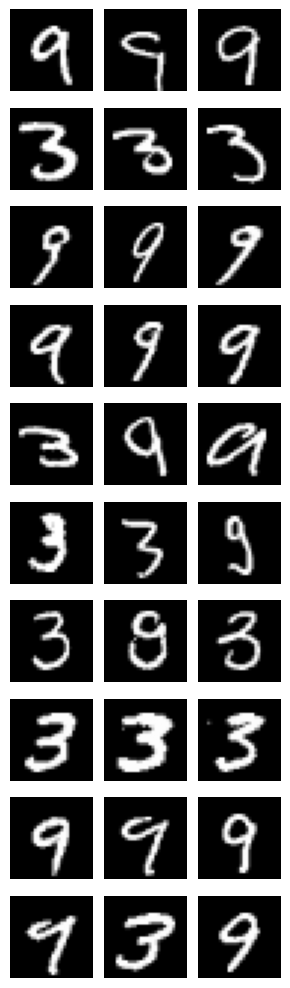

In [ ]:
# k-means k=10
plot_kmeans(10)

In [ ]:
from sklearn.decomposition import PCA

# for problem 3
def pca_kmean(n):

  pca = PCA(n_components=n)
  reduced = pca.fit_transform(subset)

  ks = [2,3,5,10]
  for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit_predict(reduced)
    accuracy.append(check_acc(kmeans,k))
    print(kmeans)


# for plot problem 3
def plot_pca_kmean(n):

  pca = PCA(n_components=n)
  reduced = pca.fit_transform(subset)

  fig, axes = plt.subplots(2, 2, figsize=(6, 6))

  ks = [2,3,5,10]

  for l, ax in enumerate(axes.flat):
    kmeans = KMeans(n_clusters=ks[l], random_state=0, n_init="auto").fit_predict(reduced)
    accuracy.append(check_acc(kmeans,ks[l]))
    label = []
    for i in range(ks[l]):
      cluster = []
      for j in range(len(reduced)):
        if kmeans[j]==i: cluster.append(reduced[j])
      label.append(cluster)

    for i in range(ks[l]):
      x, y = zip(*label[i])
      ax.scatter(x, y)
  plt.tight_layout()
  plt.show()


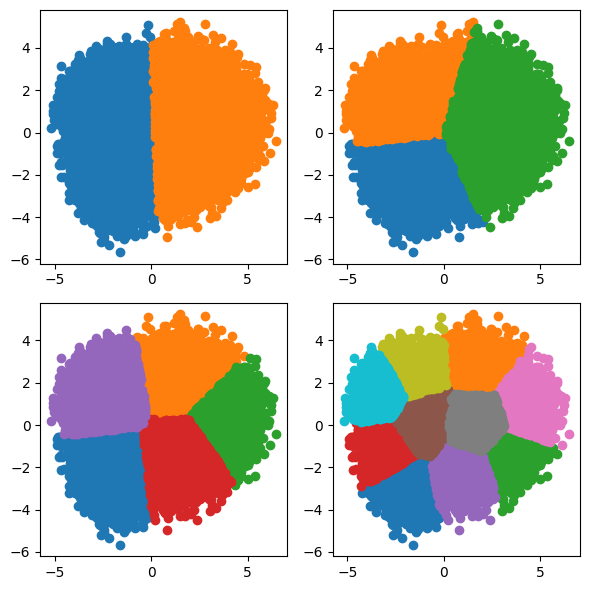

In [ ]:
# eigenspace of dimension 2
plot_pca_kmean(2)

In [ ]:
# eigenspace of dimension 5
pca_kmean(5)

[0 1 1 ... 0 1 0]
[0 2 2 ... 0 2 0]
[3 2 2 ... 0 2 3]
[2 4 1 ... 9 1 2]


In [ ]:
# eigenspace of dimension 10
pca_kmean(10)

[0 1 1 ... 0 1 0]
[2 1 1 ... 0 1 2]
[2 3 3 ... 0 3 2]
[9 8 5 ... 0 5 3]


In [ ]:
# total accuracy result
ks=[2,3,5,10]
for i in range(len(accuracy)):
  if i<4: print(f"raw data (k={ks[i]}): {accuracy[i]}")
  elif i<8: print(f"dim reduced to 2 (k={ks[i%4]}): {accuracy[i]}")
  elif i<12: print(f"dim reduced to 5 (k={ks[i%4]}): {accuracy[i]}")
  else: print(f"dim reduced to 10 (k={ks[i%4]}): {accuracy[i]}")

raw data (k=2): 0.9349786896620081
raw data (k=3): 0.9489543066706314
raw data (k=5): 0.9574784418673803
raw data (k=10): 0.9641193378927545
dim reduced to 2 (k=2): 0.9324016255327584
dim reduced to 2 (k=3): 0.8983050847457628
dim reduced to 2 (k=5): 0.9481613638616315
dim reduced to 2 (k=10): 0.9343839825552582
dim reduced to 5 (k=2): 0.9323025076816335
dim reduced to 5 (k=3): 0.9470710674992566
dim reduced to 5 (k=5): 0.9131727624145108
dim reduced to 5 (k=10): 0.943701060561007
dim reduced to 10 (k=2): 0.9336901575973833
dim reduced to 10 (k=3): 0.9244721974427594
dim reduced to 10 (k=5): 0.9533154921201308
dim reduced to 10 (k=10): 0.9516304886510061


# Report



1. What is the goal of clustering? What is k-Means clustering? Explain why it is an unsupervised algorithm.

2. KMeans is an unsupervised algorithm, so we can use it even without label information in real applications. However, since we have the labels in this homework (‘3’s and ‘9’s), which method (raw vs. dim-reduced, different k values) produced the 'best' clusters according to the labels? Why?

3. If we had no prior knowledge of our data categories, how could we judge whether the clusters are meaningful? (Hint: do some research on internal validation metrics, visualization, interpretability).

4. How can we decide the “right” value of k in a k-Means algorithm? Search for general strategies, and explain one. Is there a universal rule-of-thumb strategy? Why yes or why not?

5. Does the way you initialize centroids affect the final clusters? Why? (You may try different initialization methods if you wish, e.g., choosing random data samples as centroids instead of random points in the space.)

6. How does reducing the dimensionality of a dataset affect clustering results in terms of interpretability, computation, and performance? When do you think it is beneficial to use such strategy?

7. Conclude with your main takeaways from this homework: what you learned, what worked well, and what challenges you encountered.



1. Clustering is a algorithm that groups the data with similar features. K-means algorithm is the algorithm that computes the mean values of each groups and re-group a data if the other group's mean value is closer than it's original group mean value. Therefore, it's very important how to compute the distance of these data or values. Because it only needs the distance to find the right clustering, there's no need of labels. That's why it's unsupervised learning.

2. For raw data and dim-reduced data, the result of the raw data was slightly better than dim-reduced one. For different K values, larger K value made better result. The best one in my experiment was 'raw data with k=10'. I think the case of raw data vs dim-reduced, it is clear that raw data is containing more informations and features of the data more than dim-reduced one. Therefore, when it comes to clustering, I think without information loss will produce better result. In case of different K values, bigger K value means there are more choices to make, and it also means that there's might be a better choice. Therefore, it can be custered in more detailed features, so that the final result would be better.

3. There are many ways to evaluate the clustering algorithms. One way is to measure the distance of one group's member with other closest groups and compute the evaluation. One ther way is to compute the similarity of the data within the group and compute the evaluation.

4. The most well-known method is the elbow method. It's a method that calculate how tightly points are grouped inside each cluster that called WSS for different k. And find the k value that WSS stops decrease sharply. This point in graph is alike to an elbow. There are many other methods as well. However in data analysis, there's no one true approch that works best in all cases.

5. I only tried for random initialization for centroids. Since there's no way to figure out how the data samples are distributed, picking some data or random init would generate similar result. But maybe the time taken for the method might be shorten in some cases.

6. I think by dimension reduction there would be much less computational cost because computing distance is main cost for k-means. I think the performance of this would depends on how it keeps the crucial features of the data when reducing the dimension. If there are lot's of useless information, it would be very useful to reduce the dimension. But if all features matter a lot, summurizing it would decrease the performance.

7. Whole practice was really helpful for me in many ways. I learned how to implement machine learning algorithm with sklearn, and I had a good time programming it with different ways. Also it was a good experience to see how data is really conputed and visuallized.




Gen AI prompt I used for this assignment:
1. how to plot 3 picture in one row
2. does reducing dimention to eigenspace mean same for pca ?

